## Here I compare histograms of ERA5 and met office wind products, subdivided by month and decade, to empirically and non-rigorously look at how similar they are

In summary: 

- the products are quite comparable visually
- if anything the met office *overestimates* high-speed tails, not underestimates
- both products show an increase in wind speed and zonal wind velocity, especially in summer
- to test rigor of similarity of distribution - Kolmogorov-Smirnov? Or?


In [104]:
import xarray as xr
import glob
import numpy as np
import netCDF4 as nc
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [105]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [106]:
rdir = '/gpfs/data/greenocean/software/resources/MetProcessed/MET_forcing/'

def make_yearlist_met(yrst, yrend):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []; xlist = []
    for i in range(0,len(yrs)):
        ty = f'{rdir}/scen_1A/MetOffice_tauy_y{yrs[i]}.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
        
        tx = f'{rdir}/scen_1A/MetOffice_taux_y{yrs[i]}.nc'
        t2 = glob.glob(tx)
        xlist.append(t2[0])
        
    return ylist, xlist

yl_met, xl_met = make_yearlist_met(1950,1959)

In [107]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

so_csize = (tmesh['csize'][0:37,:].values)
so_csize_broad = np.zeros([365*10, 37, 182])

for i in range(0,365*10):
    so_csize_broad[i,:,:] = so_csize

## histogram example:

https://github.com/SalishSeaCast/analysis_tereza/blob/master/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/KEY_REBOOT/MF04_aragonite_saturation_PI6.ipynb

In [108]:
def get_histo_met(start, end, typ = 'tauy', var = 'vflx'):
    
    yrs = np.arange(start,end+1,1)
    big_broad = np.zeros([365*10, 37, 182])
    ind = 0
    for i in range(0,len(yrs)):
        
        ty = f'{rdir}/scen_1A/MetOffice_{typ}_y{yrs[i]}.nc'
        t2 = glob.glob(ty)
        met_y = nc.Dataset(t2[0])
        met_vflx = met_y[var][:,0:37,:]
        # print(np.shape(met_vflx))
        # print(np.shape(big_broad))
        big_broad[ind:ind+365,:,:] = met_vflx
        ind = ind+365
    
    nbins = 25
    hist_met_vflx, bins = np.histogram(np.ravel(big_broad), bins=nbins,\
                                 range = [-25, 25], weights=np.ravel(so_csize_broad))

    bin_cent = bins + (bins[1]-bins[0])/2
    tot_count = np.sum(hist_met_vflx)

    
    binsback = bins[0:nbins]
    histback = hist_met_vflx/tot_count
    
    return binsback, histback
    


def get_histo_era(start, end, typ = 'tauy', var = 'vflx'):
    
    yrs = np.arange(start,end+1,1)
    big_broad = np.zeros([365*10, 37, 182])
    ind = 0
    for i in range(0,len(yrs)):
        
        ty = f'/gpfs/data/greenocean/software/products/ERA5Forcing/daily/{typ}_1d_{yrs[i]}_daily.nc'
        #print(ty)
        t2 = glob.glob(ty)
        met_y = nc.Dataset(t2[0])
        met_vflx = met_y[var][0:365,0:37,:]
        # print(np.shape(met_vflx))
        # print(np.shape(big_broad))
        big_broad[ind:ind+365,:,:] = met_vflx
        ind = ind+365
    
    nbins = 25
    hist_met_vflx, bins = np.histogram(np.ravel(big_broad), bins=nbins,\
                                 range = [-25, 25], weights=np.ravel(so_csize_broad))

    bin_cent = bins + (bins[1]-bins[0])/2
    tot_count = np.sum(hist_met_vflx)

    
    binsback = bins[0:nbins]
    histback = hist_met_vflx/tot_count
    
    return binsback, histback
    


        

In [109]:
met_hists_tauy_ar = []
met_bins_tauy_ar = []

start = 1950
for d in range(0,7):
    end = start+9
    binsback, histback = get_histo_met(start, end, typ = 'tauy', var = 'vflx')
    met_hists_tauy_ar.append(histback)
    met_bins_tauy_ar.append(binsback)
    start = start+10

   ####### 
met_hists_taux_ar = []
met_bins_taux_ar = []

start = 1950
for d in range(0,7):
    end = start+9
    binsback, histback = get_histo_met(start, end, typ = 'taux', var = 'uflx')
    met_hists_taux_ar.append(histback)
    met_bins_taux_ar.append(binsback)
    start = start+10

In [110]:
era_hists_tauy_ar = []
era_bins_tauy_ar = []

start = 1950
for d in range(0,7):
    end = start+9
    binsback, histback = get_histo_era(start, end, typ = 'tauy', var = 'vflx')
    era_hists_tauy_ar.append(histback)
    era_bins_tauy_ar.append(binsback)
    start = start+10

   ####### 
era_hists_taux_ar = []
era_bins_taux_ar = []

start = 1950
for d in range(0,7):
    end = start+9
    binsback, histback = get_histo_era(start, end, typ = 'taux', var = 'uflx')
    era_hists_taux_ar.append(histback)
    era_bins_taux_ar.append(binsback)
    start = start+10

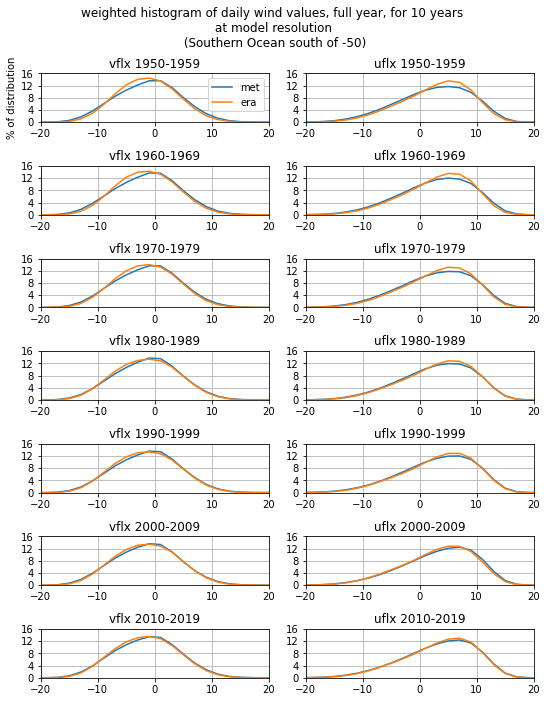

In [126]:
fact = 0.55

fig, axs = plt.subplots(7,2, figsize=(14*fact, 18*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,7):
    axs[0+2*i].plot(met_bins_tauy_ar[i],met_hists_tauy_ar[i]*100, label = 'met')
    axs[1+2*i].plot(met_bins_taux_ar[i],met_hists_taux_ar[i]*100, label = 'met')
    axs[0+2*i].plot(era_bins_tauy_ar[i],era_hists_tauy_ar[i]*100, label = 'era')
    axs[1+2*i].plot(era_bins_taux_ar[i],era_hists_taux_ar[i]*100, label = 'era')
    axs[0+2*i].set_title(f'vflx {1950+i*10}-{1950+i*10+9}')
    axs[1+2*i].set_title(f'uflx {1950+i*10}-{1950+i*10+9}')
    axs[0].legend()

for i in range(0,14):
    axs[i].grid()
    axs[i].set_xlim([-20,20])
    axs[i].set_ylim([0,16])
    axs[i].set_yticks(np.arange(0,20,4))
    axs[0].set_ylabel('% of distribution')

plt.suptitle('weighted histogram of daily wind values, full year, for 10 years \n at model resolution \n (Southern Ocean south of -50)')
fig.tight_layout()

#### what we learn from this plot:

- taken for the whole year, these products are quite similar
- uflx has a stronger directionality, as expected
- if anything, the met product slightly *overestimates* the high tails in uflx?

In [128]:
# code to get starts and ends
# days_in_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
# startsmo = np.zeros_like(days_in_month)
# endsmo = np.zeros_like(starts)

# for i in range(0,12):
#     startsmo[i] = np.sum(days_in_month[0:i])
#     endsmo[i] = np.sum(days_in_month[0:i+1])

# print(startsmo)
# print(endsmo)

In [130]:
def era_histograms(start, end):
    ### get start and end day
    days_in_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
    startsmo = np.zeros_like(days_in_month)
    endsmo = np.zeros_like(starts)

    for i in range(0,12):
        startsmo[i] = np.sum(days_in_month[0:i])
        endsmo[i] = np.sum(days_in_month[0:i+1])

    ## number of bins
    nbins = 25
    histo_vflx = np.zeros([12,nbins])
    histo_uflx = np.zeros([12,nbins])
    histo_wspd = np.zeros([12,nbins])
    print(f'extracting ERA monthly histograms for years {start}-{end}')
    for m in range(0,12):

        #print(f'month {m+1}')
        startmo = startsmo[m];
        endmo = endsmo[m];
        yrs = np.arange(start,end,1)
        ### get braodcasted weights
        tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
        tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

        so_csize = (tmesh['csize'][0:37,:].values)
        so_csize_broad = np.zeros([(endmo-startmo)*(end-start), 37, 182])

        for i in range(0,(endmo-startmo)*(end-start)):
            so_csize_broad[i,:,:] = so_csize

        ## monthly histograms for vflx
        big_broad_vflx = np.zeros([(endmo-startmo)*(end-start), 37, 182])
        ind = 0
        for i in range(0,len(yrs)):

            typ = 'tauy'; var = 'vflx'
            ty = f'/gpfs/data/greenocean/software/products/ERA5Forcing/daily/{typ}_1d_{yrs[i]}_daily.nc'
            t2 = glob.glob(ty)
            met_y = nc.Dataset(t2[0])
            met_vflx = met_y[var][startmo:endmo,0:37,:]
            big_broad_vflx[ind:(ind+(endmo-startmo)),:,:] = met_vflx
            ind = ind+(endmo-startmo)

        hist_met_vflx, bins = np.histogram(np.ravel(big_broad_vflx), bins=nbins,\
                                     range = [-25, 25], weights=np.ravel(so_csize_broad))

        bin_cent = bins + (bins[1]-bins[0])/2
        tot_count = np.sum(hist_met_vflx)
        binsback = bins[0:nbins]
        histback = hist_met_vflx/tot_count
        histo_vflx[m,:] = histback

        ## monthly histograms for uflx
        big_broad_uflx = np.zeros([(endmo-startmo)*(end-start), 37, 182])
        ind = 0
        for i in range(0,len(yrs)):

            typ = 'taux'; var = 'uflx'
            ty = f'/gpfs/data/greenocean/software/products/ERA5Forcing/daily/{typ}_1d_{yrs[i]}_daily.nc'
            t2 = glob.glob(ty)
            met_y = nc.Dataset(t2[0])
            met_uflx = met_y[var][startmo:endmo,0:37,:]
            big_broad_uflx[ind:(ind+(endmo-startmo)),:,:] = met_uflx
            ind = ind+(endmo-startmo)

        hist_met_uflx, bins = np.histogram(np.ravel(big_broad_uflx), bins=nbins,\
                                     range = [-25, 25], weights=np.ravel(so_csize_broad))

        bin_cent = bins + (bins[1]-bins[0])/2
        binsback_uflx = bin_cent[0:nbins]
        tot_count = np.sum(hist_met_uflx)
        binsback = bins[0:nbins]
        histback = hist_met_uflx/tot_count
        histo_uflx[m,:] = histback

        #wspd
        big_broad_wspd = np.sqrt(big_broad_uflx**2 + big_broad_vflx**2)
        hist_met_wspd, bins = np.histogram(np.ravel(big_broad_wspd), bins=nbins,\
                                     range = [0, 25], weights=np.ravel(so_csize_broad))

        bin_cent = bins + (bins[1]-bins[0])/2
        tot_count = np.sum(hist_met_wspd)
        binsback_wspd = bin_cent[0:nbins]
        histback = hist_met_wspd/tot_count
        histo_wspd[m,:] = histback
    
    return binsback_uflx, binsback_wspd, histo_uflx, histo_vflx, histo_wspd


In [131]:
start = 1950; end = 1960
bin_cent_uflx_50s, bin_cent_wspd_50s, histo_uflx_50s, histo_vflx_50s, histo_wspd_50s\
= era_histograms(start, end)

start = 1980; end = 1990
bin_cent_uflx_80s, bin_cent_wspd_80s, histo_uflx_80s, histo_vflx_80s, histo_wspd_80s\
= era_histograms(start, end)

start = 2010; end = 2020
bin_cent_uflx_10s, bin_cent_wspd_10s, histo_uflx_10s, histo_vflx_10s, histo_wspd_10s\
= era_histograms(start, end)

extracting ERA monthly histograms for years 1950-1960
extracting ERA monthly histograms for years 1980-1990
extracting ERA monthly histograms for years 2010-2020


####  Visualizing ERA monthly uflx, vflx, wspd for 1950s, 1980s, 2010s

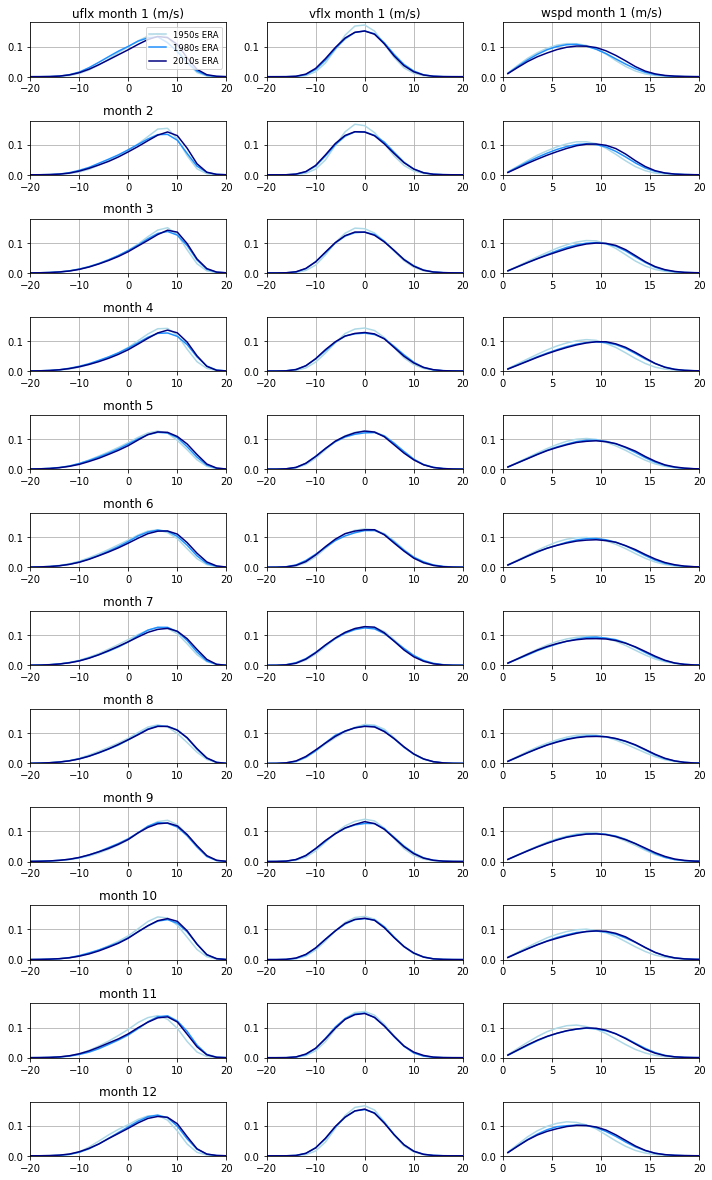

In [132]:
fact = 0.5
fig, axs = plt.subplots(12,3, figsize=(20*fact, 33*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.tight_layout()

for i in range(0,12):
    
    col = 'lightblue'; lab = '1950s ERA'
    axs[i*3].plot(bin_cent_uflx_50s,histo_uflx_50s[i,:], color = col, label = lab)
    axs[i*3+1].plot(bin_cent_uflx_50s,histo_vflx_50s[i,:], color = col)
    axs[i*3+2].plot(bin_cent_wspd_50s,histo_wspd_50s[i,:], color = col)
    
    col = 'dodgerblue'; lab = '1980s ERA'
    axs[i*3].plot(bin_cent_uflx_50s,histo_uflx_80s[i,:], color = col, label = lab)
    axs[i*3+1].plot(bin_cent_uflx_50s,histo_vflx_80s[i,:], color = col, label = lab)
    axs[i*3+2].plot(bin_cent_wspd_50s,histo_wspd_80s[i,:], color = col, label = lab)
    
    col = 'navy'; lab = '2010s ERA'
    axs[i*3].plot(bin_cent_uflx_50s,histo_uflx_10s[i,:], color = col, label = lab)
    axs[i*3+1].plot(bin_cent_uflx_50s,histo_vflx_10s[i,:], color = col, label = lab)
    axs[i*3+2].plot(bin_cent_wspd_50s,histo_wspd_10s[i,:], color = col, label = lab)
    
    
    axs[i*3].set_xlim([-20,20])
    
    
    axs[i*3+1].set_xlim([-20,20])    
    axs[i*3+2].set_xlim([0,20])
    
    axs[0].set_title('uflx month 1 (m/s)')
    axs[1].set_title('vflx month 1 (m/s)')
    axs[2].set_title('wspd month 1 (m/s)')
    
    if i>0:
        axs[i*3].set_title(f'month {i+1}')
        
        
axs[0].legend(ncol = 1, fontsize = 8.5,  loc = 'upper right')

for i in range(0,36):
    axs[i].grid()
    axs[i].set_ylim([0,0.18])
    
plt.tight_layout()

what we learn from this plot:

- the zonal winds (uflx, left columns) are much more directional (in positive u direction) than the meridional winds (vflx, center column)
- from 1950s to 1980s to 2010s we see a clear, if small, shift towards the higher tails of the distribution, especially in the summer months (12, 1, 2)
- (it is overly busy, of course - lots of lines to look at.)

#### repeating exactly the same for the met office product


In [133]:
def met_histograms(start, end):
    ### get start and end day
    days_in_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
    startsmo = np.zeros_like(days_in_month)
    endsmo = np.zeros_like(starts)

    for i in range(0,12):
        startsmo[i] = np.sum(days_in_month[0:i])
        endsmo[i] = np.sum(days_in_month[0:i+1])

    ## number of bins
    nbins = 25
    histo_vflx = np.zeros([12,nbins])
    histo_uflx = np.zeros([12,nbins])
    histo_wspd = np.zeros([12,nbins])
    print(f'extracting MET monthly histograms for years {start}-{end}')
    for m in range(0,12):

        #print(f'month {m+1}')
        startmo = startsmo[m];
        endmo = endsmo[m];
        yrs = np.arange(start,end,1)
        ### get braodcasted weights
        tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
        tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

        so_csize = (tmesh['csize'][0:37,:].values)
        so_csize_broad = np.zeros([(endmo-startmo)*(end-start), 37, 182])

        for i in range(0,(endmo-startmo)*(end-start)):
            so_csize_broad[i,:,:] = so_csize

        ## monthly histograms for vflx
        big_broad_vflx = np.zeros([(endmo-startmo)*(end-start), 37, 182])
        ind = 0
        for i in range(0,len(yrs)):

            typ = 'tauy'; var = 'vflx'
            #ty = f'/gpfs/data/greenocean/software/products/ERA5Forcing/daily/{typ}_1d_{yrs[i]}_daily.nc'
            ty = f'{rdir}/scen_1A/MetOffice_{typ}_y{yrs[i]}.nc'
            t2 = glob.glob(ty)
            met_y = nc.Dataset(t2[0])
            met_vflx = met_y[var][startmo:endmo,0:37,:]
            big_broad_vflx[ind:(ind+(endmo-startmo)),:,:] = met_vflx
            ind = ind+(endmo-startmo)

        hist_met_vflx, bins = np.histogram(np.ravel(big_broad_vflx), bins=nbins,\
                                     range = [-25, 25], weights=np.ravel(so_csize_broad))

        bin_cent = bins + (bins[1]-bins[0])/2
        tot_count = np.sum(hist_met_vflx)
        binsback = bins[0:nbins]
        histback = hist_met_vflx/tot_count
        histo_vflx[m,:] = histback

        ## monthly histograms for uflx
        big_broad_uflx = np.zeros([(endmo-startmo)*(end-start), 37, 182])
        ind = 0
        for i in range(0,len(yrs)):

            typ = 'taux'; var = 'uflx'
            #ty = f'/gpfs/data/greenocean/software/products/ERA5Forcing/daily/{typ}_1d_{yrs[i]}_daily.nc'
            ty = f'{rdir}/scen_1A/MetOffice_{typ}_y{yrs[i]}.nc'
            t2 = glob.glob(ty)
            met_y = nc.Dataset(t2[0])
            met_uflx = met_y[var][startmo:endmo,0:37,:]
            big_broad_uflx[ind:(ind+(endmo-startmo)),:,:] = met_uflx
            ind = ind+(endmo-startmo)

        hist_met_uflx, bins = np.histogram(np.ravel(big_broad_uflx), bins=nbins,\
                                     range = [-25, 25], weights=np.ravel(so_csize_broad))

        bin_cent = bins + (bins[1]-bins[0])/2
        binsback_uflx = bin_cent[0:nbins]
        tot_count = np.sum(hist_met_uflx)
        binsback = bins[0:nbins]
        histback = hist_met_uflx/tot_count
        histo_uflx[m,:] = histback

        #wspd
        big_broad_wspd = np.sqrt(big_broad_uflx**2 + big_broad_vflx**2)
        hist_met_wspd, bins = np.histogram(np.ravel(big_broad_wspd), bins=nbins,\
                                     range = [0, 25], weights=np.ravel(so_csize_broad))

        bin_cent = bins + (bins[1]-bins[0])/2
        tot_count = np.sum(hist_met_wspd)
        binsback_wspd = bin_cent[0:nbins]
        histback = hist_met_wspd/tot_count
        histo_wspd[m,:] = histback
    
    return binsback_uflx, binsback_wspd, histo_uflx, histo_vflx, histo_wspd


In [134]:
start = 1950; end = 1960
bin_cent_uflx_50s, bin_cent_wspd_50s, methisto_uflx_50s, methisto_vflx_50s, methisto_wspd_50s\
= met_histograms(start, end)

start = 1980; end = 1990
bin_cent_uflx_80s, bin_cent_wspd_80s, methisto_uflx_80s, methisto_vflx_80s, methisto_wspd_80s\
= met_histograms(start, end)

start = 2010; end = 2020
bin_cent_uflx_10s, bin_cent_wspd_10s, methisto_uflx_10s, methisto_vflx_10s, methisto_wspd_10s\
= met_histograms(start, end)

extracting MET monthly histograms for years 1950-1960
extracting MET monthly histograms for years 1980-1990
extracting MET monthly histograms for years 2010-2020


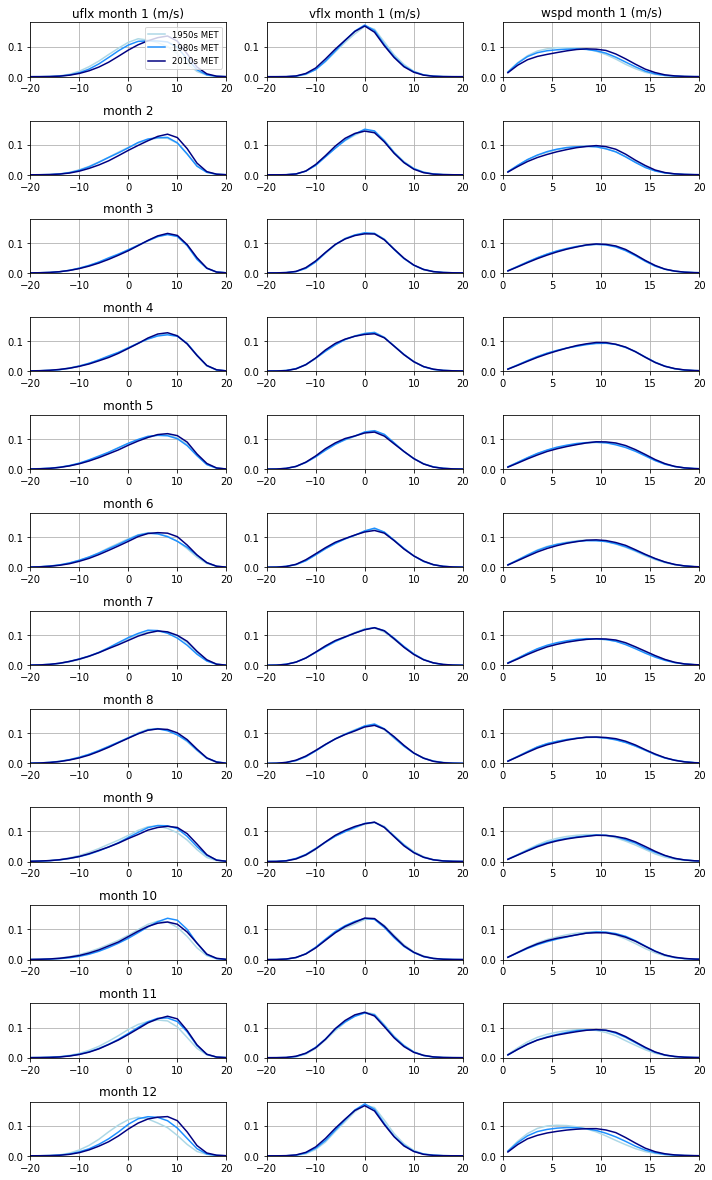

In [135]:
fact = 0.5
fig, axs = plt.subplots(12,3, figsize=(20*fact, 33*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.tight_layout()

for i in range(0,12):
    
    col = 'lightblue'; lab = '1950s MET'
    axs[i*3].plot(bin_cent_uflx_50s,methisto_uflx_50s[i,:], color = col, label = lab)
    axs[i*3+1].plot(bin_cent_uflx_50s,methisto_vflx_50s[i,:], color = col)
    axs[i*3+2].plot(bin_cent_wspd_50s,methisto_wspd_50s[i,:], color = col)
    
    col = 'dodgerblue'; lab = '1980s MET'
    axs[i*3].plot(bin_cent_uflx_50s,methisto_uflx_80s[i,:], color = col, label = lab)
    axs[i*3+1].plot(bin_cent_uflx_50s,methisto_vflx_80s[i,:], color = col, label = lab)
    axs[i*3+2].plot(bin_cent_wspd_50s,methisto_wspd_80s[i,:], color = col, label = lab)
    
    col = 'navy'; lab = '2010s MET'
    axs[i*3].plot(bin_cent_uflx_50s,methisto_uflx_10s[i,:], color = col, label = lab)
    axs[i*3+1].plot(bin_cent_uflx_50s,methisto_vflx_10s[i,:], color = col, label = lab)
    axs[i*3+2].plot(bin_cent_wspd_50s,methisto_wspd_10s[i,:], color = col, label = lab)
    
    
    axs[i*3].set_xlim([-20,20])
    
    
    axs[i*3+1].set_xlim([-20,20])    
    axs[i*3+2].set_xlim([0,20])
    
    axs[0].set_title('uflx month 1 (m/s)')
    axs[1].set_title('vflx month 1 (m/s)')
    axs[2].set_title('wspd month 1 (m/s)')
    
    if i>0:
        axs[i*3].set_title(f'month {i+1}')
        
        
axs[0].legend(ncol = 1, fontsize = 8.5,  loc = 'upper right')

for i in range(0,36):
    axs[i].grid()
    axs[i].set_ylim([0,0.18])
    
plt.tight_layout()

what we learn from this plot:

- at first glance the main points from above (uflx directionality, shift towards higher tails) is similar in met office as in ERA, maybe more pronounced seasonally?

#### directly visually comparing monthly ERA and MET office uflx and wspd for these 3 decades

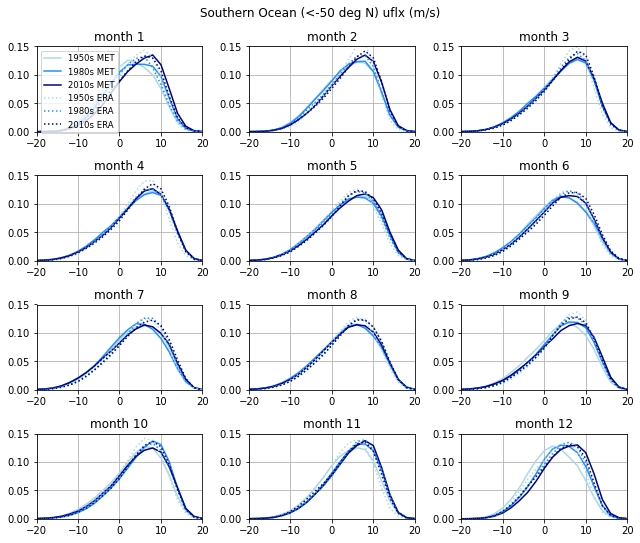

In [136]:
fact = 0.45
fig, axs = plt.subplots(4,3, figsize=(20*fact, 17*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.tight_layout()

for i in range(0,12):
    
    col = 'lightblue'; lab = '1950s MET'
    axs[i].plot(bin_cent_uflx_50s,methisto_uflx_50s[i,:], color = col, label = lab)
    col = 'dodgerblue'; lab = '1980s MET'
    axs[i].plot(bin_cent_uflx_50s,methisto_uflx_80s[i,:], color = col, label = lab)
    col = 'navy'; lab = '2010s MET'
    axs[i].plot(bin_cent_uflx_50s,methisto_uflx_10s[i,:], color = col, label = lab)
 
    col = 'lightblue'; lab = '1950s ERA'
    axs[i].plot(bin_cent_uflx_50s,histo_uflx_50s[i,:], linestyle = ':', color = col, label = lab)
    col = 'dodgerblue'; lab = '1980s ERA'
    axs[i].plot(bin_cent_uflx_50s,histo_uflx_80s[i,:], linestyle = ':', color = col, label = lab)
    col = 'navy'; lab = '2010s ERA'
    axs[i].plot(bin_cent_uflx_50s,histo_uflx_10s[i,:], linestyle = ':', color = col, label = lab)
    
    axs[i].set_xlim([-20,20])

    
#     axs[0].set_title('uflx month 1 (m/s)')
#     axs[1].set_title('vflx month 1 (m/s)')
#     axs[2].set_title('wspd month 1 (m/s)')
    
#     if i>0:
#         axs[i*3].set_title(f'month {i+1}')

    axs[i].set_title(f'month {i+1}')
        
axs[0].legend(ncol = 1, fontsize = 8.5,  loc = 'upper left')

for i in range(0,12):
    axs[i].grid()
    axs[i].set_ylim([0,0.15])
    
plt.suptitle('Southern Ocean (<-50 deg N) uflx (m/s)')
plt.tight_layout()

#### what we learn here:

- summer changes in uflx most pronounced in both products
- general coherence and subtlety of shifts
- shift to higher frequency winds in summer

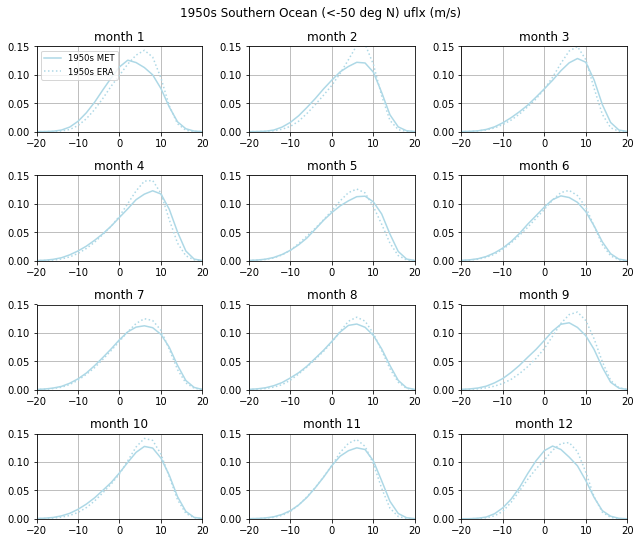

In [137]:
fact = 0.45
fig, axs = plt.subplots(4,3, figsize=(20*fact, 17*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.tight_layout()

for i in range(0,12):
    
    col = 'lightblue'; lab = '1950s MET'
    axs[i].plot(bin_cent_uflx_50s,methisto_uflx_50s[i,:], color = col, label = lab)
    # col = 'dodgerblue'; lab = '1980s MET'
    # axs[i].plot(bin_cent_uflx_50s,methisto_uflx_80s[i,:], color = col, label = lab)
    # col = 'navy'; lab = '2010s MET'
    # axs[i].plot(bin_cent_uflx_50s,methisto_uflx_10s[i,:], color = col, label = lab)
 
    col = 'lightblue'; lab = '1950s ERA'
    axs[i].plot(bin_cent_uflx_50s,histo_uflx_50s[i,:], linestyle = ':', color = col, label = lab)
#     col = 'dodgerblue'; lab = '1980s ERA'
#     axs[i].plot(bin_cent_uflx_50s,histo_uflx_80s[i,:], linestyle = ':', color = col, label = lab)
#     col = 'navy'; lab = '2010s ERA'
#     axs[i].plot(bin_cent_uflx_50s,histo_uflx_10s[i,:], linestyle = ':', color = col, label = lab)
    
    axs[i].set_xlim([-20,20])

    
#     axs[0].set_title('uflx month 1 (m/s)')
#     axs[1].set_title('vflx month 1 (m/s)')
#     axs[2].set_title('wspd month 1 (m/s)')
    
#     if i>0:
#         axs[i*3].set_title(f'month {i+1}')

    axs[i].set_title(f'month {i+1}')
        
axs[0].legend(ncol = 1, fontsize = 8.5,  loc = 'upper left')

for i in range(0,12):
    axs[i].grid()
    axs[i].set_ylim([0,0.15])
    
plt.suptitle('1950s Southern Ocean (<-50 deg N) uflx (m/s)')
plt.tight_layout()

- relative to other decades, potentially worse coherence in uflx

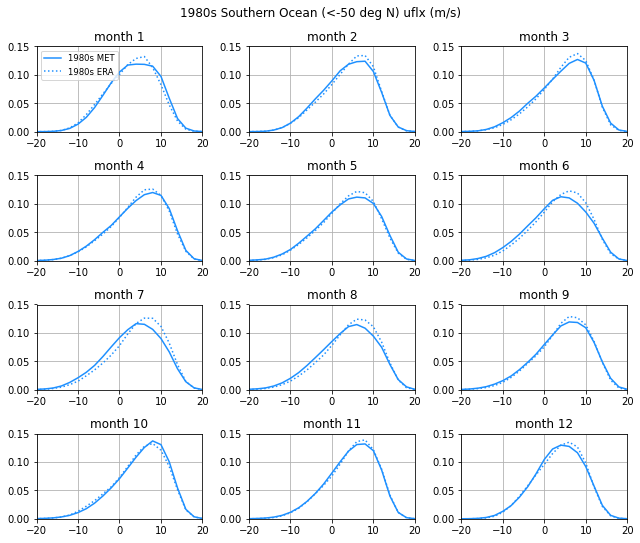

In [138]:
fact = 0.45
fig, axs = plt.subplots(4,3, figsize=(20*fact, 17*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.tight_layout()

for i in range(0,12):
    
    # col = 'lightblue'; lab = '1950s MET'
    # axs[i].plot(bin_cent_uflx_50s,methisto_uflx_50s[i,:], color = col, label = lab)
    col = 'dodgerblue'; lab = '1980s MET'
    axs[i].plot(bin_cent_uflx_50s,methisto_uflx_80s[i,:], color = col, label = lab)
    # col = 'navy'; lab = '2010s MET'
    # axs[i].plot(bin_cent_uflx_50s,methisto_uflx_10s[i,:], color = col, label = lab)
 
    # col = 'lightblue'; lab = '1950s ERA'
    # axs[i].plot(bin_cent_uflx_50s,histo_uflx_50s[i,:], linestyle = ':', color = col, label = lab)
    col = 'dodgerblue'; lab = '1980s ERA'
    axs[i].plot(bin_cent_uflx_50s,histo_uflx_80s[i,:], linestyle = ':', color = col, label = lab)
#     col = 'navy'; lab = '2010s ERA'
#     axs[i].plot(bin_cent_uflx_50s,histo_uflx_10s[i,:], linestyle = ':', color = col, label = lab)
    
    axs[i].set_xlim([-20,20])

    
#     axs[0].set_title('uflx month 1 (m/s)')
#     axs[1].set_title('vflx month 1 (m/s)')
#     axs[2].set_title('wspd month 1 (m/s)')
    
#     if i>0:
#         axs[i*3].set_title(f'month {i+1}')

    axs[i].set_title(f'month {i+1}')
        
axs[0].legend(ncol = 1, fontsize = 8.5,  loc = 'upper left')

for i in range(0,12):
    axs[i].grid()
    axs[i].set_ylim([0,0.15])
    
plt.suptitle('1980s Southern Ocean (<-50 deg N) uflx (m/s)')
plt.tight_layout()

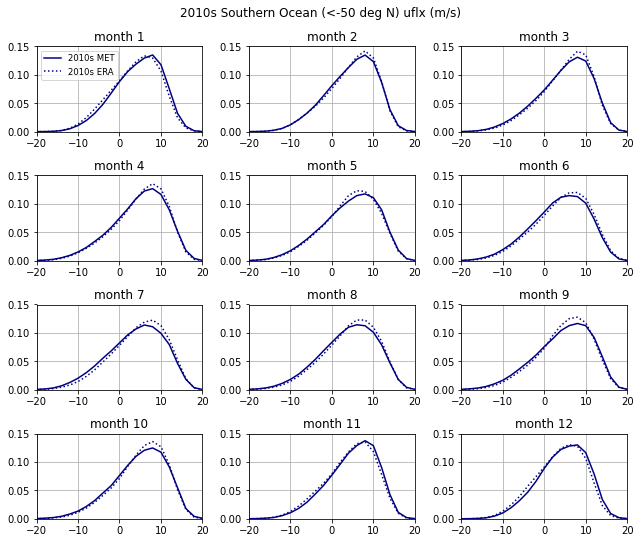

In [139]:
fact = 0.45
fig, axs = plt.subplots(4,3, figsize=(20*fact, 17*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.tight_layout()

for i in range(0,12):
    
    # col = 'lightblue'; lab = '1950s MET'
    # axs[i].plot(bin_cent_uflx_50s,methisto_uflx_50s[i,:], color = col, label = lab)
    # col = 'dodgerblue'; lab = '1980s MET'
    # axs[i].plot(bin_cent_uflx_50s,methisto_uflx_80s[i,:], color = col, label = lab)
    col = 'navy'; lab = '2010s MET'
    axs[i].plot(bin_cent_uflx_50s,methisto_uflx_10s[i,:], color = col, label = lab)
 
    # col = 'lightblue'; lab = '1950s ERA'
    # axs[i].plot(bin_cent_uflx_50s,histo_uflx_50s[i,:], linestyle = ':', color = col, label = lab)
    # col = 'dodgerblue'; lab = '1980s ERA'
    # axs[i].plot(bin_cent_uflx_50s,histo_uflx_80s[i,:], linestyle = ':', color = col, label = lab)
    col = 'navy'; lab = '2010s ERA'
    axs[i].plot(bin_cent_uflx_50s,histo_uflx_10s[i,:], linestyle = ':', color = col, label = lab)
    
    axs[i].set_xlim([-20,20])

    
#     axs[0].set_title('uflx month 1 (m/s)')
#     axs[1].set_title('vflx month 1 (m/s)')
#     axs[2].set_title('wspd month 1 (m/s)')
    
#     if i>0:
#         axs[i*3].set_title(f'month {i+1}')

    axs[i].set_title(f'month {i+1}')
        
axs[0].legend(ncol = 1, fontsize = 8.5,  loc = 'upper left')

for i in range(0,12):
    axs[i].grid()
    axs[i].set_ylim([0,0.15])
    
plt.suptitle('2010s Southern Ocean (<-50 deg N) uflx (m/s)')
plt.tight_layout()

#### let's do the same for windspeed:

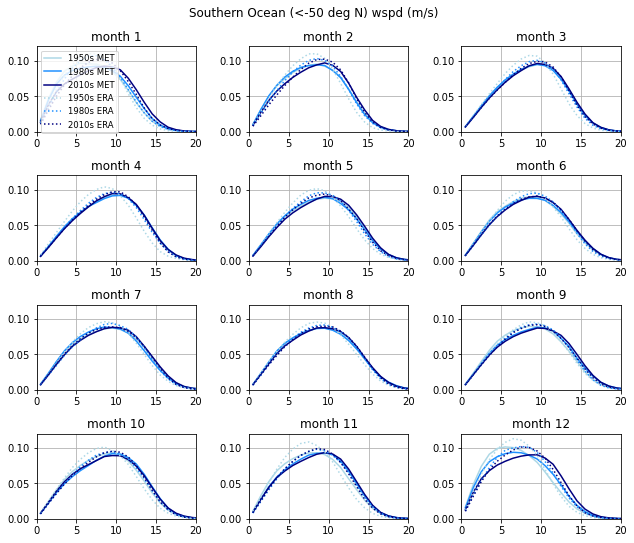

In [140]:
fact = 0.45
fig, axs = plt.subplots(4,3, figsize=(20*fact, 17*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.tight_layout()

for i in range(0,12):
    
    col = 'lightblue'; lab = '1950s MET'
    axs[i].plot(bin_cent_wspd_50s,methisto_wspd_50s[i,:], color = col, label = lab)
    col = 'dodgerblue'; lab = '1980s MET'
    axs[i].plot(bin_cent_wspd_50s,methisto_wspd_80s[i,:], color = col, label = lab)
    col = 'navy'; lab = '2010s MET'
    axs[i].plot(bin_cent_wspd_50s,methisto_wspd_10s[i,:], color = col, label = lab)
 
    col = 'lightblue'; lab = '1950s ERA'
    axs[i].plot(bin_cent_wspd_50s,histo_wspd_50s[i,:], linestyle = ':', color = col, label = lab)
    col = 'dodgerblue'; lab = '1980s ERA'
    axs[i].plot(bin_cent_wspd_50s,histo_wspd_80s[i,:], linestyle = ':', color = col, label = lab)
    col = 'navy'; lab = '2010s ERA'
    axs[i].plot(bin_cent_wspd_50s,histo_wspd_10s[i,:], linestyle = ':', color = col, label = lab)
    
    axs[i].set_xlim([0,20])
    axs[i].set_title(f'month {i+1}')
        
axs[0].legend(ncol = 1, fontsize = 8.5,  loc = 'upper left')

for i in range(0,12):
    axs[i].grid()
    axs[i].set_ylim([0,0.12])
    
plt.suptitle('Southern Ocean (<-50 deg N) wspd (m/s)')
plt.tight_layout()

### what have we learned here:

- summer winds (months 12, 1, 2) accelerate much more than winter winds, which is what we want
- how good is the agreement between these distributions? (Kolmogorov-Smirnov test)

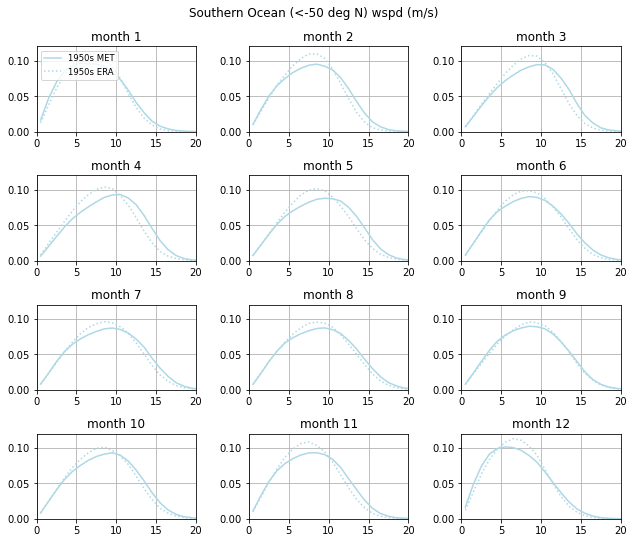

In [141]:
fact = 0.45
fig, axs = plt.subplots(4,3, figsize=(20*fact, 17*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.tight_layout()

for i in range(0,12):
    
    col = 'lightblue'; lab = '1950s MET'
    axs[i].plot(bin_cent_wspd_50s,methisto_wspd_50s[i,:], color = col, label = lab)
    # col = 'dodgerblue'; lab = '1980s MET'
    # axs[i].plot(bin_cent_wspd_50s,methisto_wspd_80s[i,:], color = col, label = lab)
    # col = 'navy'; lab = '2010s MET'
    # axs[i].plot(bin_cent_wspd_50s,methisto_wspd_10s[i,:], color = col, label = lab)
 
    col = 'lightblue'; lab = '1950s ERA'
    axs[i].plot(bin_cent_wspd_50s,histo_wspd_50s[i,:], linestyle = ':', color = col, label = lab)
#     col = 'dodgerblue'; lab = '1980s ERA'
#     axs[i].plot(bin_cent_wspd_50s,histo_wspd_80s[i,:], linestyle = ':', color = col, label = lab)
#     col = 'navy'; lab = '2010s ERA'
#     axs[i].plot(bin_cent_wspd_50s,histo_wspd_10s[i,:], linestyle = ':', color = col, label = lab)
    
    axs[i].set_xlim([0,20])
    axs[i].set_title(f'month {i+1}')
        
axs[0].legend(ncol = 1, fontsize = 8.5,  loc = 'upper left')

for i in range(0,12):
    axs[i].grid()
    axs[i].set_ylim([0,0.12])
    
plt.suptitle('1950s Southern Ocean (<-50 deg N) wspd (m/s)')
plt.tight_layout()

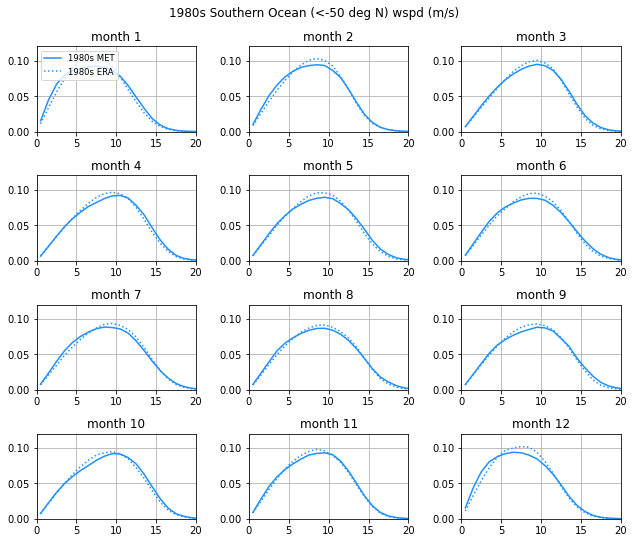

In [142]:
fact = 0.45
fig, axs = plt.subplots(4,3, figsize=(20*fact, 17*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.tight_layout()

for i in range(0,12):
    
    # col = 'lightblue'; lab = '1950s MET'
    # axs[i].plot(bin_cent_wspd_50s,methisto_wspd_50s[i,:], color = col, label = lab)
    col = 'dodgerblue'; lab = '1980s MET'
    axs[i].plot(bin_cent_wspd_50s,methisto_wspd_80s[i,:], color = col, label = lab)
    # col = 'navy'; lab = '2010s MET'
    # axs[i].plot(bin_cent_wspd_50s,methisto_wspd_10s[i,:], color = col, label = lab)
 
    # col = 'lightblue'; lab = '1950s ERA'
    # axs[i].plot(bin_cent_wspd_50s,histo_wspd_50s[i,:], linestyle = ':', color = col, label = lab)
    col = 'dodgerblue'; lab = '1980s ERA'
    axs[i].plot(bin_cent_wspd_50s,histo_wspd_80s[i,:], linestyle = ':', color = col, label = lab)
#     col = 'navy'; lab = '2010s ERA'
#     axs[i].plot(bin_cent_wspd_50s,histo_wspd_10s[i,:], linestyle = ':', color = col, label = lab)
    
    axs[i].set_xlim([0,20])
    axs[i].set_title(f'month {i+1}')
        
axs[0].legend(ncol = 1, fontsize = 8.5,  loc = 'upper left')

for i in range(0,12):
    axs[i].grid()
    axs[i].set_ylim([0,0.12])
    
plt.suptitle('1980s Southern Ocean (<-50 deg N) wspd (m/s)')
plt.tight_layout()

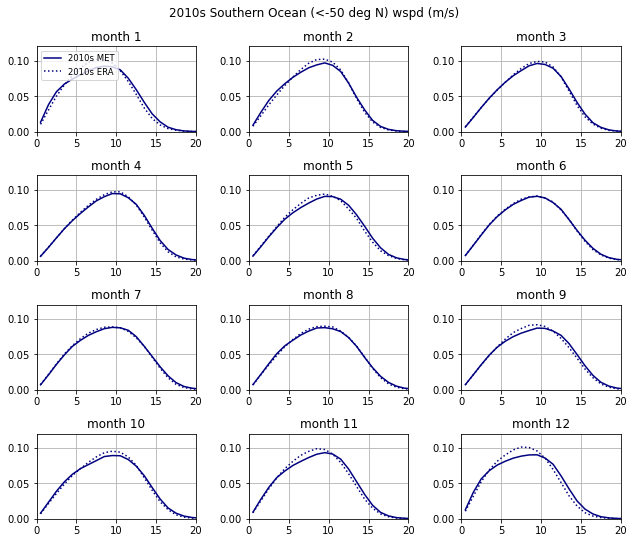

In [144]:
fact = 0.45
fig, axs = plt.subplots(4,3, figsize=(20*fact, 17*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.tight_layout()

for i in range(0,12):
    
    # col = 'lightblue'; lab = '1950s MET'
    # axs[i].plot(bin_cent_wspd_50s,methisto_wspd_50s[i,:], color = col, label = lab)
    # col = 'dodgerblue'; lab = '1980s MET'
    # axs[i].plot(bin_cent_wspd_50s,methisto_wspd_80s[i,:], color = col, label = lab)
    col = 'navy'; lab = '2010s MET'
    axs[i].plot(bin_cent_wspd_50s,methisto_wspd_10s[i,:], color = col, label = lab)
 
    # col = 'lightblue'; lab = '1950s ERA'
    # axs[i].plot(bin_cent_wspd_50s,histo_wspd_50s[i,:], linestyle = ':', color = col, label = lab)
    # col = 'dodgerblue'; lab = '1980s ERA'
    # axs[i].plot(bin_cent_wspd_50s,histo_wspd_80s[i,:], linestyle = ':', color = col, label = lab)
    col = 'navy'; lab = '2010s ERA'
    axs[i].plot(bin_cent_wspd_50s,histo_wspd_10s[i,:], linestyle = ':', color = col, label = lab)
    
    axs[i].set_xlim([0,20])
    axs[i].set_title(f'month {i+1}')
        
axs[0].legend(ncol = 1, fontsize = 8.5,  loc = 'upper left')

for i in range(0,12):
    axs[i].grid()
    axs[i].set_ylim([0,0.12])
    
plt.suptitle('2010s Southern Ocean (<-50 deg N) wspd (m/s)')
plt.tight_layout()

In [145]:
print('done')

done
